# Multiple Linear Regression Model

*This model is used for the prediction of demand for shared Bikes*

- Identify, Which variables are significant in predicting the demand for shared bikes.
- Understand, How well those variables describe the bike demands.

### Step 1: Reading and Understanding the Data

Let us import numpy and Pandas and read the dataset

In [754]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

In [755]:
# read the data
bikes = pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [756]:
bikes.shape

(730, 16)

In [757]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [758]:
# Checking for the missing values

bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [759]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Dropping useless variables
By looking at the data dictionary and info() above, we conclude that the following features are of no use and can be dropped:-

- instant: This feature gives the index of records. For this, we can use the default index given in pandas dataframe.
- dteday: This feature gives the date of record. This information is redundant as there are two other features mnth (Month) and yr (Year)
- casual & registered: These two values give count of casual and registered users respectively. However, there is a column cnt containing sum of these two columns. As these two will not serve any purpose independently and the same information is already provided in column cnt, we drop them.

In [760]:
# Drop the aforesaid 4 features and view the first five rows of our new dataframe

bikes.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Step 2: Visualising the Data

Let us visualise the numerical variables

<Figure size 1500x1000 with 0 Axes>

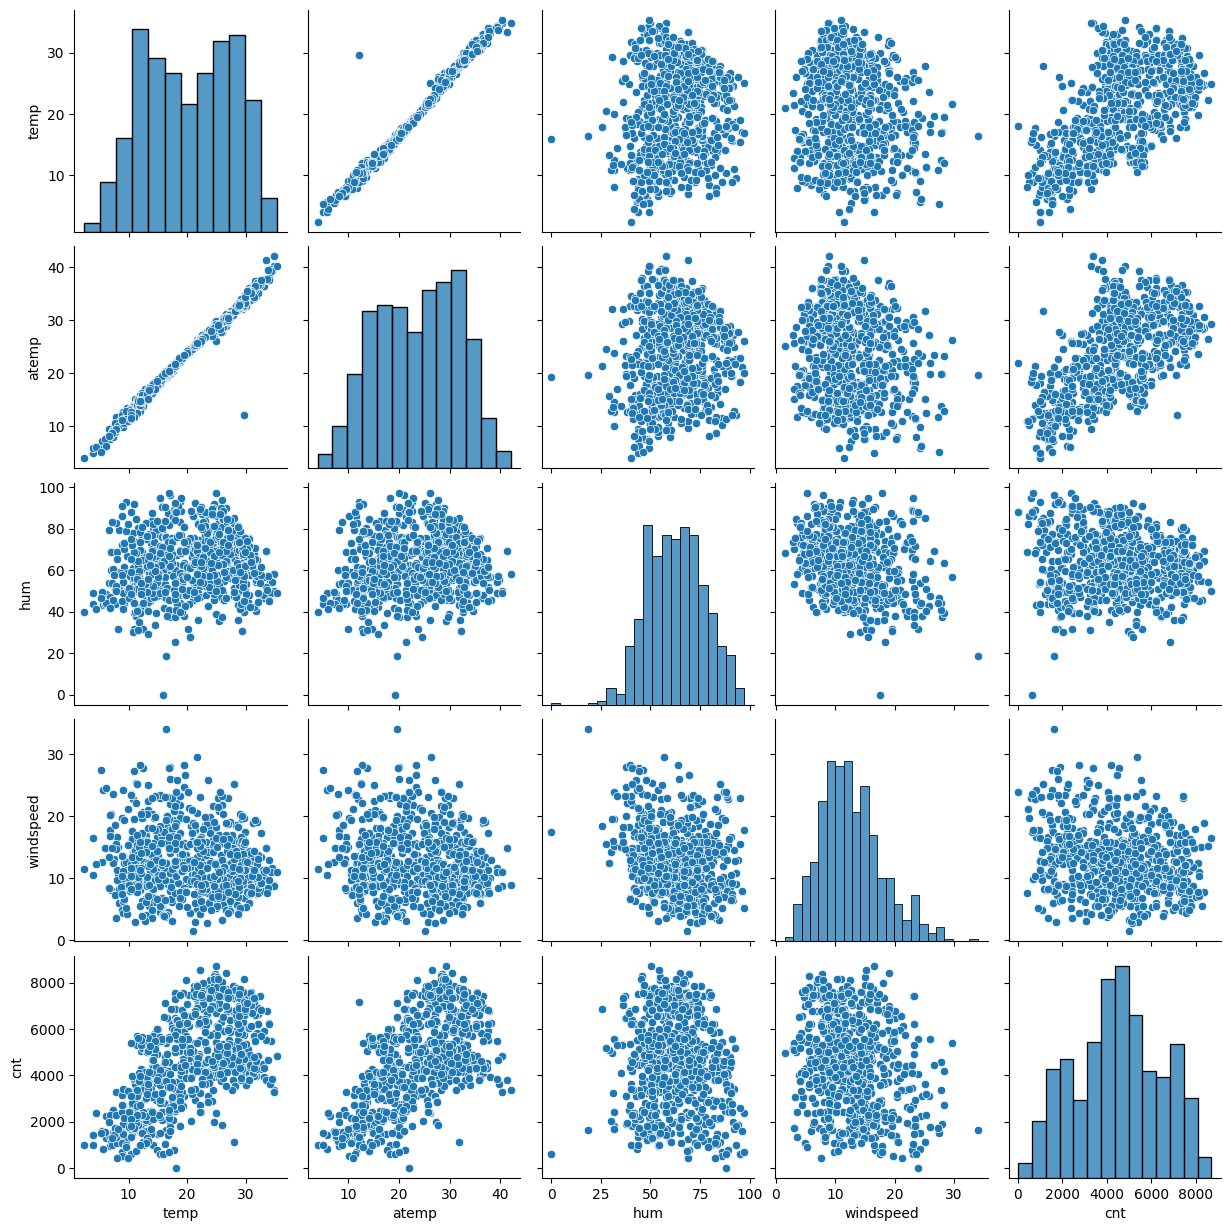

In [761]:
# Create a list of numerical variables only
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Visualise correlations among these numerical variables by plotting multiple scatter plots

plt.figure(figsize=(15,10))
sns.pairplot(bikes[num_vars])
plt.show()

#### Inferences:
- From above scatter plots, we observe that 'cnt' has positive correlation with 'temp' and 'atemp'.
- There is strong collinearity among the variables 'temp' and 'atemp'.
- So, we have to remove any one of them.
- As 'temp' is more sensible, we drop 'atemp'.

In [762]:
# Removing variable 'atemp' and look at the first 5 rows

bikes.drop(['atemp'], axis=1, inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


### Handling Categorical Variables
- Before visualising categorical variables, we need to do some modifications to some of them.
- We need to convert variables 'season', 'weathersit', 'mnth' and 'weekday' to categorical string values because the numeric values associated with these labels may indicate that there is some order to them, which is actually not the case. Converting them will also help in better visualisation and ease our process of creating dummy variables out of them.

In [763]:
# First, we will convert 'season' to categorical string values

bikes['season'] = bikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Check if the above conversion worked fine

bikes['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [764]:
# Similarly, we will convert 'weathersit' to categorical string values

bikes['weathersit'] = bikes['weathersit'].map({1:'clear', 2:'mist', 3:'light', 4:'heavy'})
bikes['weathersit'].value_counts()

weathersit
clear    463
mist     246
light     21
Name: count, dtype: int64

In [765]:
# Next, we will convert 'mnth' to categorical string values

bikes['mnth'] = bikes['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bikes['mnth'].value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [766]:
# Lastly, we will convert 'weekday' to categorical string values

bikes['weekday'] = bikes['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
bikes['weekday'].value_counts()

weekday
Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: count, dtype: int64

In [767]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,43.6957,12.522300,1600


### Visualising Categorical variables

Now we will visualise the categorical variables by plotting boxplots

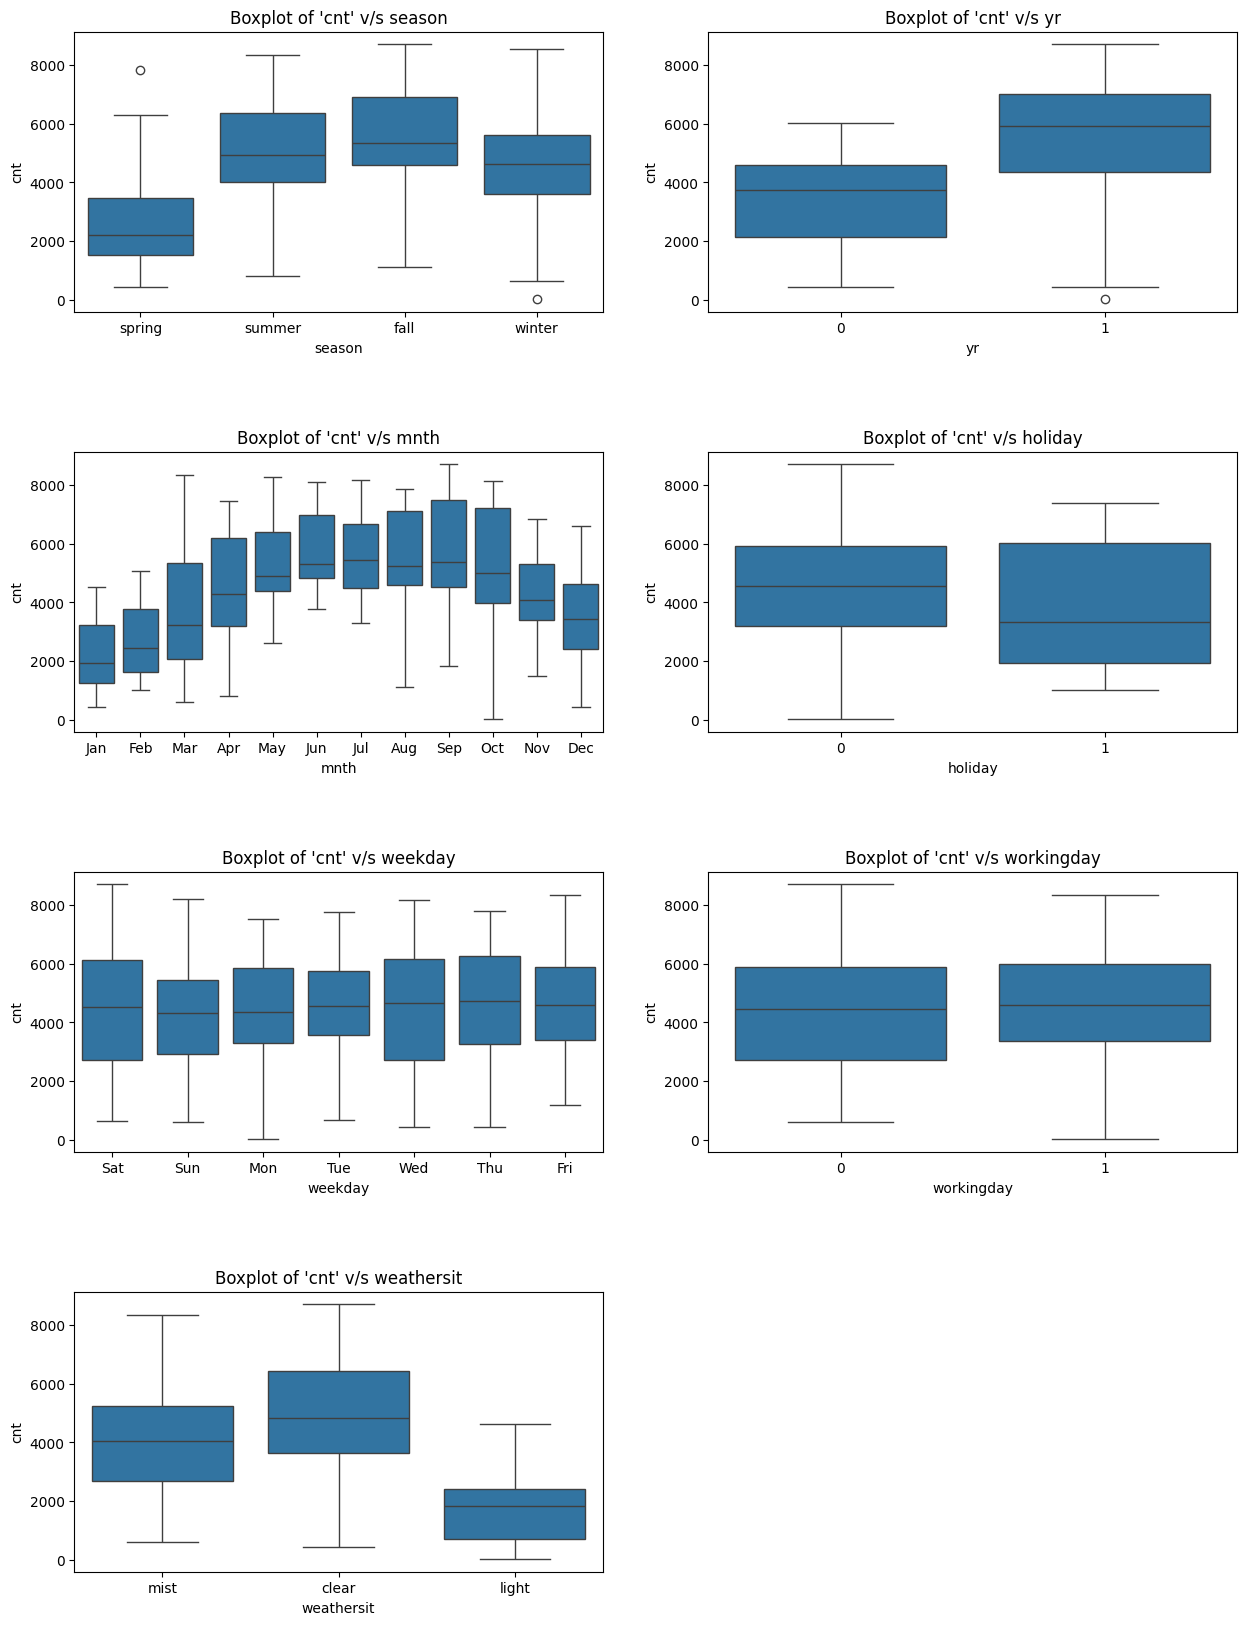

In [768]:
# Separating the categorical variables

cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Plotting Boxplots for each categorical variables

plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=.5)
for i, col in enumerate(cat_vars):
    plt.subplot(4,2,i+1)
    plt.title(label="Boxplot of 'cnt' v/s " + col)
    sns.boxplot(x=col, y='cnt', data=bikes);

#### Inferences:
- More bikes are rented in fall and summer seasons, and from May to October months
- More number of bikes were rented in 2019 than in 2018.
- If the weather is clear (or having few clouds), then more bikes are rented. No bikes are rented in heavy weather.
- Rest of the features holiday, workingday and weekday don't show any discernible pattern and hence, it is suggested not to use them for prediction of cnt.
- Overall, the data is well behaved with very few outliers.
- As we have very less data available, we will not treat outliers.

### Visualising Correlation among variables

In [769]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,43.6957,12.522300,1600


In [770]:
bikes_corr = bikes.copy()
bikes_corr.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)
bikes_corr.head()
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,43.6957,12.522300,1600


In [771]:
crln =  bikes_corr.corr()
crln

,yr,holiday,workingday,temp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.128565,-0.158186,0.627044
hum,-0.112547,-0.015662,0.023202,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,-0.098543,-0.235132,1.000000


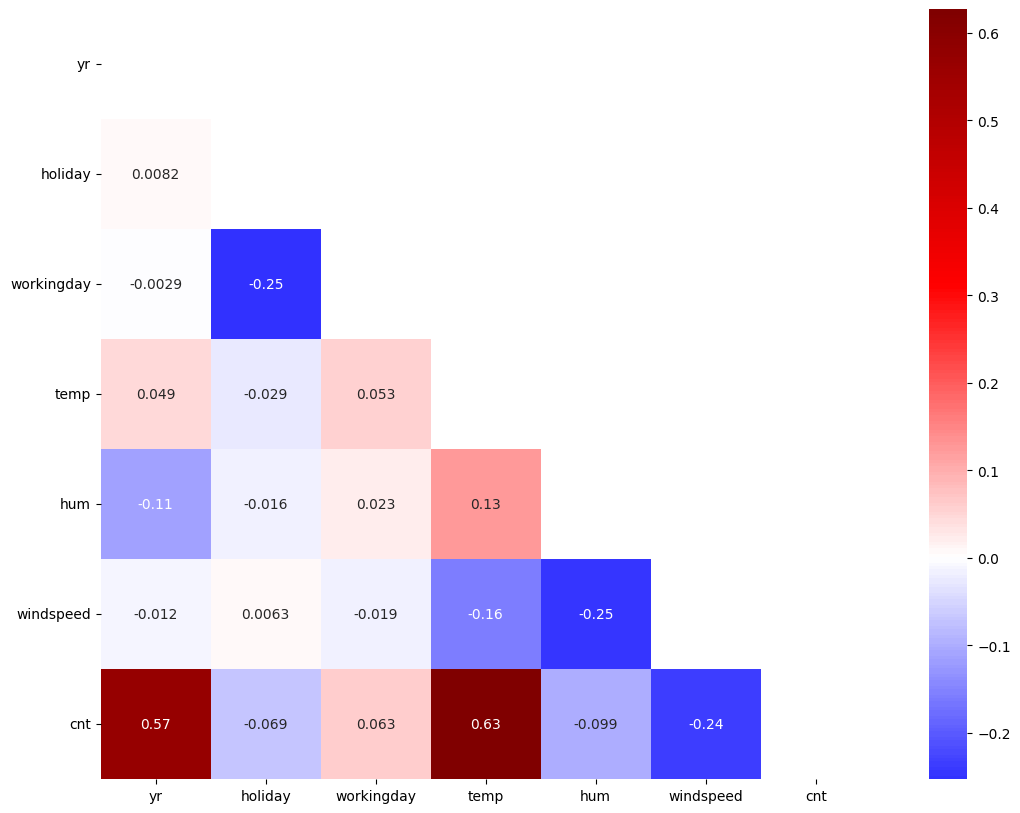

In [772]:
# To have a better understanding of correlation matrix, we plot the lower half of heatmap of this matrix

mask = np.zeros_like(crln)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,10))
sns.heatmap(crln, mask=mask, annot=True, cmap='seismic', square=True, center=0)
plt.yticks(rotation=0);

#### Inferences:
- From above heatmap, we observe our target variable 'cnt' has:
  -  High correlation with variables 'yr' and 'temp'
  -  Low correlation with 'holiday', 'workingday' and 'hum'

### Step 3: Data Preparation

Creating Dummy Variables

In [773]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,43.6957,12.522300,1600


#### Inferences:
- Categorical variables having two levels: 'yr', 'holiday'and 'workingday' are already having values as 0s and 1s. So, we don't need to map them.
- However, we need to convert categorical variables having more than two levels to dummy variables, which are 'season', 'mnth', 'weekday', 'weathersit'

In [774]:
# Create dummy variables for columns having more than two levels

varlist = ['season', 'mnth', 'weekday', 'weathersit']

In [775]:
# Creating dummy variables for above four features and then dropping the original feature as the information 
# contained in it now becomes redundant

dummy1 = pd.get_dummies(bikes[varlist], drop_first=True)
bikes = pd.concat([bikes, dummy1], axis=1)
bikes = bikes.drop(varlist, axis=1)
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light,weathersit_mist
0,0,0,0,14.110847,80.5833,10.749882,985,True,False,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,69.6087,16.652113,801,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,43.7273,16.636703,1349,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [776]:
# Checking the newly formed columns

bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_light', 'weathersit_mist'],
      dtype='object')

#### Inferences:
From above list of columns, we see that we have created:

- 3 dummy variables 'season_spring','season_summer' and 'season_winter' for 4 seasons
- 11 dummy variables 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct' and 'mnth_Sep' for 12 months
- 6 dummy variables 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue' and 'weekday_Wed' for 7 weekdays
- 2 dummy variables 'weathersit_light' and 'weathersit_mist' for 4 types of weathers (as there are no rentals in heavy weather, number of dummy variables is one less than 3)

In [777]:
# Check whether we have created any null values while forming dummy variables

bikes.isnull().sum()

yr                  0
holiday             0
workingday          0
temp                0
hum                 0
windspeed           0
cnt                 0
season_spring       0
season_summer       0
season_winter       0
mnth_Aug            0
mnth_Dec            0
mnth_Feb            0
mnth_Jan            0
mnth_Jul            0
mnth_Jun            0
mnth_Mar            0
mnth_May            0
mnth_Nov            0
mnth_Oct            0
mnth_Sep            0
weekday_Mon         0
weekday_Sat         0
weekday_Sun         0
weekday_Thu         0
weekday_Tue         0
weekday_Wed         0
weathersit_light    0
weathersit_mist     0
dtype: int64

#### Now, our data is ready for the model to be built.

### Step 4: Splitting Data into Train-Test and Scaling

In [778]:
# Performing test-train split: Train set = 70% and Test set = 30%

df_train, df_test = train_test_split(bikes, train_size=0.7, test_size=0.3, random_state=100)

In [779]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


#### Scaling all the numerical columns

In [780]:
# Creating a list of numerical columns (not including the ones with Yes-No and Dummy variables)

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

In [781]:
# Scale the data using MinMax scaling

scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light,weathersit_mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,False,False,True,...,True,False,False,False,False,False,True,False,False,False
576,1,0,1,0.815169,0.725633,0.264686,0.827658,False,False,False,...,False,False,False,False,False,False,True,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,0.465255,True,False,False,...,False,False,False,True,False,False,False,False,False,True
728,1,0,0,0.245101,0.498067,0.663106,0.204096,True,False,False,...,False,False,False,False,True,False,False,False,False,False
482,1,0,0,0.395666,0.504508,0.188475,0.482973,False,True,False,...,False,False,False,True,False,False,False,False,False,True


In [782]:
## See the statistical description of numerical columns

df_train[num_vars].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620
std,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.540519,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
90%,0.830848,0.840232,0.546410,0.834319
95%,0.878043,0.892743,0.651218,0.867361
99%,0.949327,0.952580,0.788419,0.931351


####Inference:
- As the values in each column above are gradually increasing, we can conclude that there are no outliers

#### Visualise correlations among the variables in training set

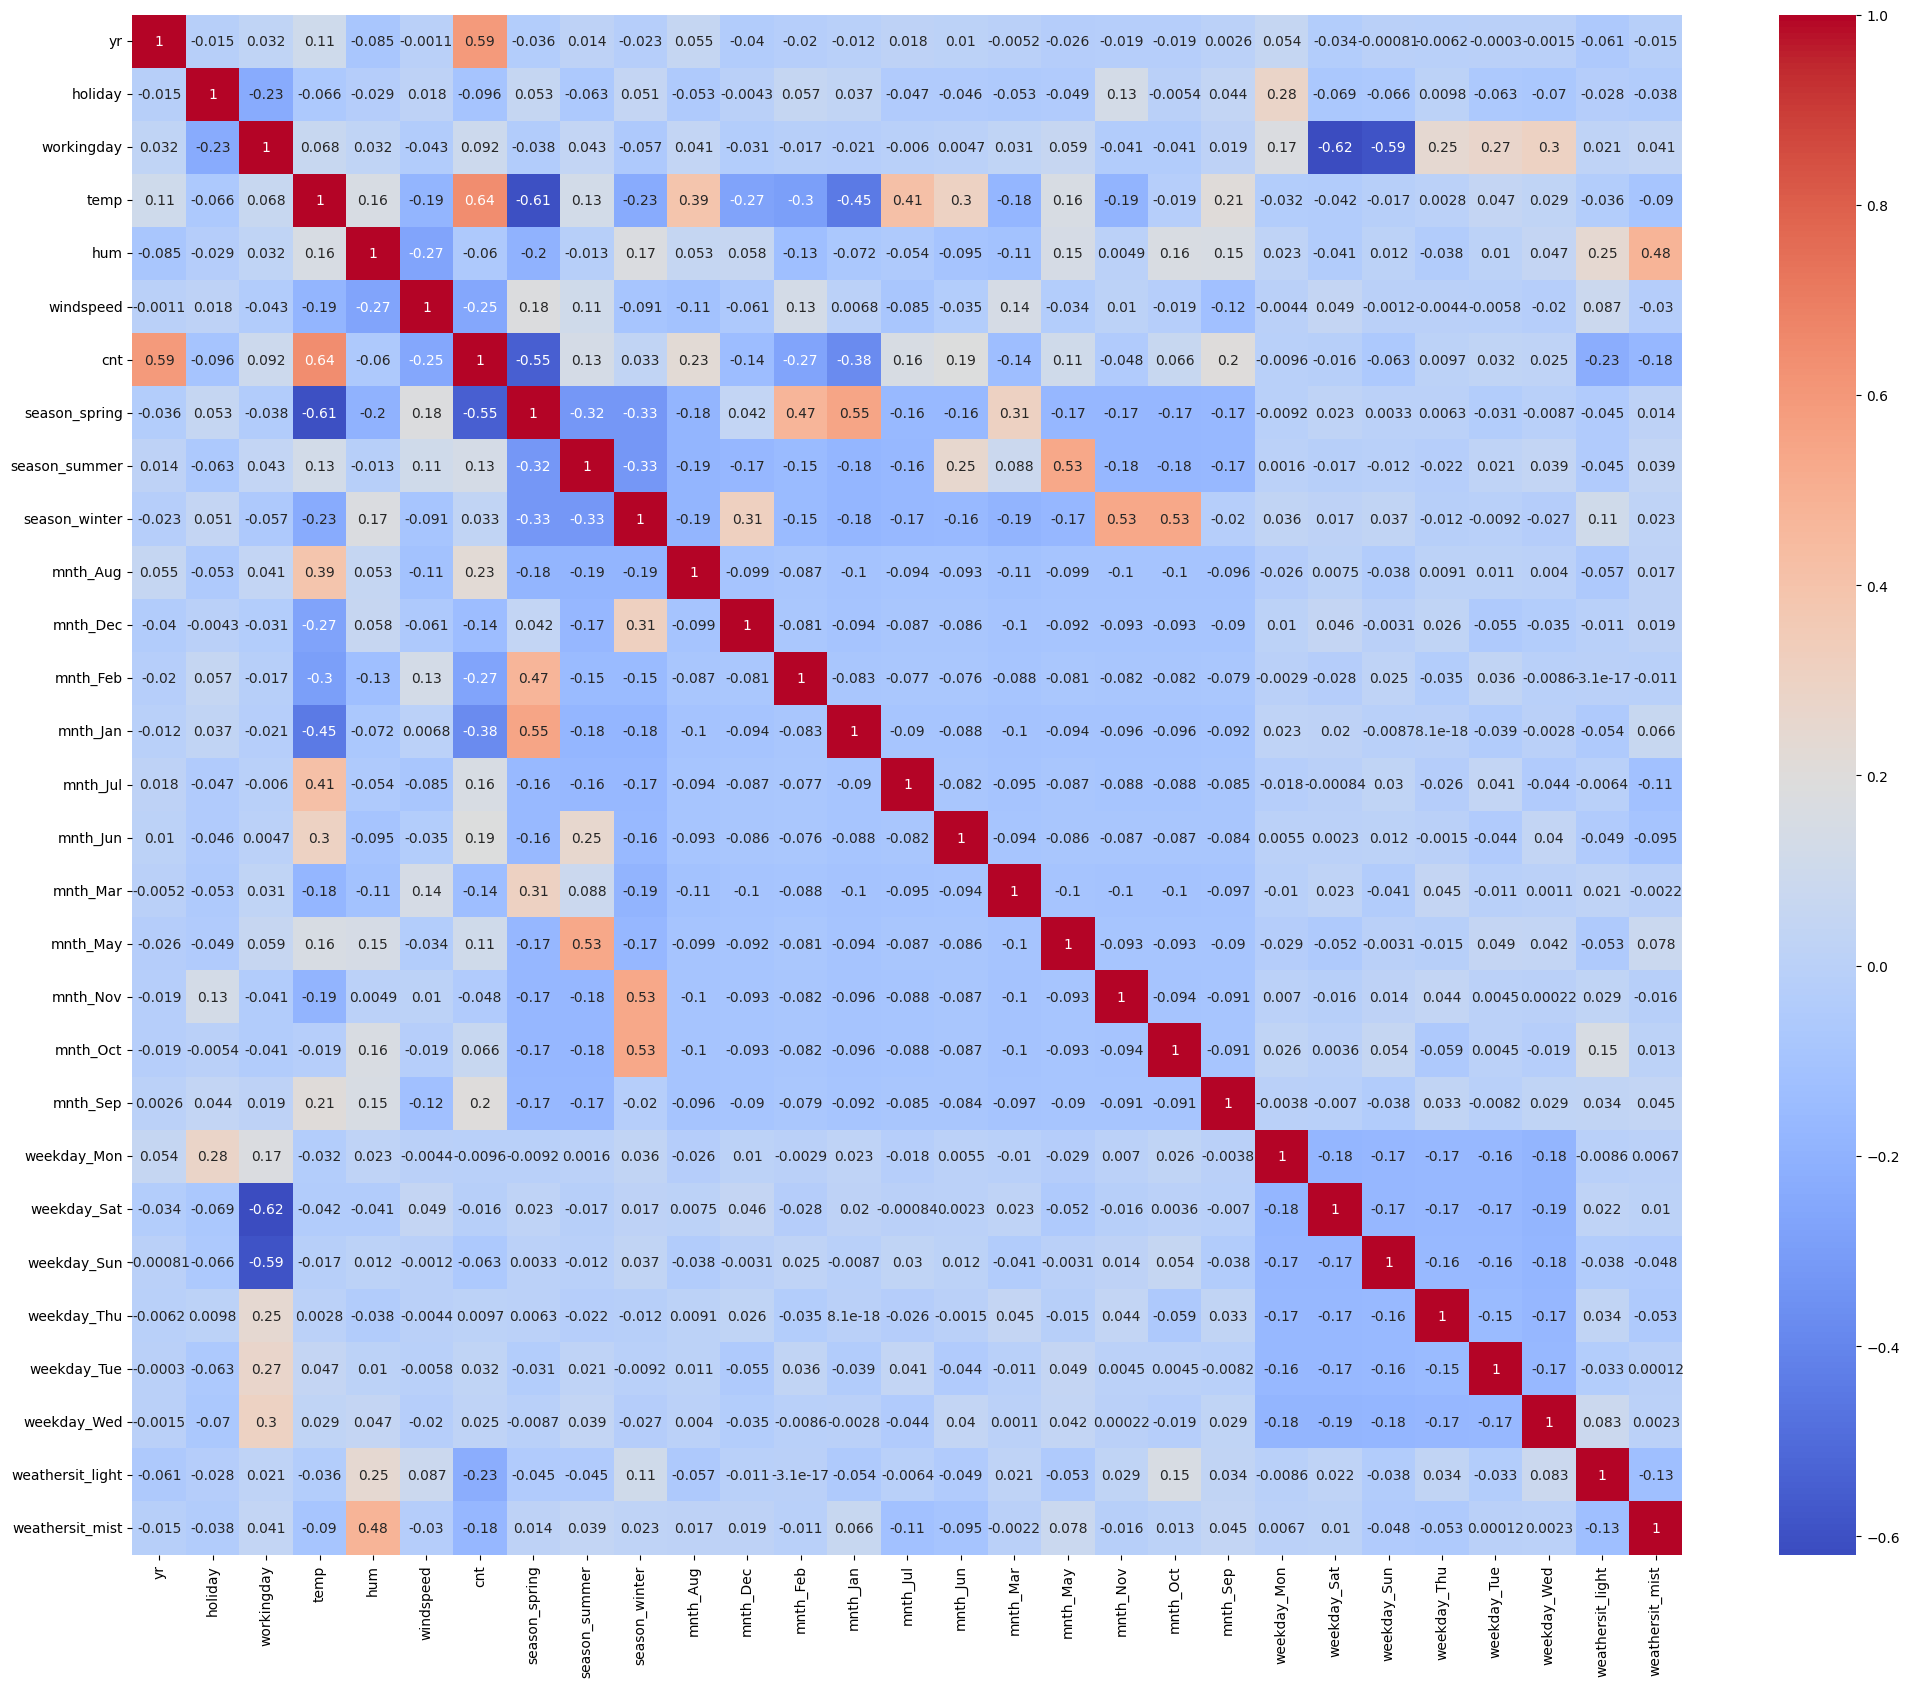

In [783]:
# Now let us look at the correlation between variables of train set

plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm');

#### Inference:
- From above heatmap, we observe that 'cnt' is highly correlated with 'yr', 'temp' and 'season_spring'.

#### Let us plot a scatter plot between 'cnt' and the numeric variable 'temp' to see this correlation

In [784]:
# Scatter plots of 'cnt' v/s 'temp'

#plt.figure(figsize=(12,5))
#bikes_temp = bikes['temp']
#sns.pairplot(bikes, vars = bikes_temp)

## Step 5: Building a Linear Model

In [785]:
y_train = df_train.pop('cnt')
X_train = df_train

In [786]:
print(X_train.shape)
print(y_train.shape)

(510, 28)
(510,)


In [787]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [788]:
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [789]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_light', 'weathersit_mist'],
      dtype='object')

In [790]:
# Build our 1st model

# Add constant
X_train_lm = sm.add_constant(X_train)

lr1 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

# Check the summary of 1st model
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          8.74e-182
Time:                        21:36:30   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2451      0.035      6.955      0.000       0.176       0.314
yr                   0.2321      0.008     28.820      0.000       0.216       0.248
holiday              0.0100      0.024      0.415      0.678      -0.037       0.057
workingday           0.0969      0.012      7.905      0.000       0.073       0.121
temp                 0.4506      0.046      9.734      0.000       0.360       0.542
hum                 -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed           -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring       -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer        0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter        0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug             0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec            -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb            -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan            -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul            -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun            -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar             0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May             0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov            -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct             0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sep             0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon         -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_Sat          0.0964      0.014      7.029      0.000       0.069       0.123
weekday_Sun          0.0419      0.014      3.006      0.003       0.014       0.069
weekday_Thu         -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_Tue         -0.0189      0.015     -1.219      0.223      -0.049       0.012
weekday_Wed         -0.0054      0.015     -0.362      0.718      -0.035       0.024
weathersit_light    -0.2574      0.026     -9.778      0.000      -0.309      -0.206
weathersit_mist     -0.0611      0.010     -5.854      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. N

#### Inferences:
- R-squared is quite high (0.853).
- But, we will also look at VIF values to decide which variable to drop

In [791]:
# Checking VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.astype(float).values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif 

,Features,VIF
2,workingday,85.58
21,weekday_Sat,19.72
22,weekday_Sun,18.35
6,season_spring,10.79
8,season_winter,9.50
7,season_summer,8.29
3,temp,7.12
17,mnth_Nov,6.80
18,mnth_Oct,6.59
9,mnth_Aug,6.43


#### Inference:
- We get R-squared value of 0.853
- The variable workingday has very high VIF (85.58)
- So, we will first drop workingday

In [792]:
# Dropping variable 'season_spring' and updating our 1st model
X = X_train.drop('season_spring', axis=1)

In [793]:
# Build 2nd model

X_train_lm = sm.add_constant(X)

lr2 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

# Check the summary of 2nd model
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          2.99e-182
Time:                        21:36:31   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -999.2
Df Residuals:                     483   BIC:                            -884.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2212      0.032      6.912      0.000       0.158       0.284
yr                   0.2318      0.008     28.742      0.000       0.216       0.248
holiday              0.0035      0.024      0.149      0.881      -0.043       0.050
workingday           0.0915      0.012      7.749      0.000       0.068       0.115
temp                 0.4598      0.046      9.993      0.000       0.369       0.550
hum                 -0.1537      0.039     -3.992      0.000      -0.229      -0.078
windspeed           -0.1897      0.026     -7.396      0.000      -0.240      -0.139
season_summer        0.0663      0.020      3.345      0.001       0.027       0.105
season_winter        0.1328      0.022      5.941      0.000       0.089       0.177
mnth_Aug             0.0389      0.030      1.292      0.197      -0.020       0.098
mnth_Dec            -0.0501      0.034     -1.496      0.135      -0.116       0.016
mnth_Feb            -0.0510      0.031     -1.657      0.098      -0.112       0.009
mnth_Jan            -0.0810      0.032     -2.563      0.011      -0.143      -0.019
mnth_Jul            -0.0165      0.032     -0.518      0.605      -0.079       0.046
mnth_Jun             0.0044      0.025      0.177      0.859      -0.044       0.053
mnth_Mar            -0.0115      0.023     -0.495      0.621      -0.057       0.034
mnth_May             0.0223      0.021      1.064      0.288      -0.019       0.064
mnth_Nov            -0.0405      0.036     -1.112      0.267      -0.112       0.031
mnth_Oct             0.0076      0.036      0.213      0.831      -0.063       0.078
mnth_Sep             0.1005      0.030      3.390      0.001       0.042       0.159
weekday_Mon         -0.0204      0.015     -1.332      0.183      -0.051       0.010
weekday_Sat          0.0901      0.013      6.843      0.000       0.064       0.116
weekday_Sun          0.0360      0.013      2.676      0.008       0.010       0.062
weekday_Thu         -0.0089      0.016     -0.570      0.569      -0.039       0.022
weekday_Tue         -0.0189      0.016     -1.215      0.225      -0.049       0.012
weekday_Wed         -0.0058      0.015     -0.392      0.695      -0.035       0.023
weathersit_light    -0.2546      0.026     -9.677      0.000      -0.306      -0.203
weathersit_mist     -0.0605      0.010     -5.793      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       81.640   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.223
Skew:                          -0.785   Prob(JB):                     5.56e-49
Kurtosis:                       5.827   Cond. No.                     8.72e+15
=====================================================

In [794]:
# Checking VIFs

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,workingday,70.92
20,weekday_Sat,16.17
21,weekday_Sun,15.16
3,temp,7.01
16,mnth_Nov,6.79
17,mnth_Oct,6.59
7,season_winter,6.08
9,mnth_Dec,5.64
11,mnth_Jan,5.23
8,mnth_Aug,5.11


In [795]:
# Dropping variable 'mnth_Nov' and updating our 1st model
X = X.drop('mnth_Nov', axis=1)

In [796]:
# Build 3rd model
X_train_lm = sm.add_constant(X)
lr3 = sm.OLS(y_train, X_train_lm.astype(float)).fit()
# Check the summary of 2nd model
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.6
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          5.16e-183
Time:                        21:36:31   Log-Likelihood:                 525.94
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     484   BIC:                            -889.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2044      0.028      7.249      0.000       0.149       0.260
yr                   0.2320      0.008     28.761      0.000       0.216       0.248
holiday             -0.0031      0.023     -0.136      0.892      -0.048       0.042
workingday           0.0882      0.011      7.714      0.000       0.066       0.111
temp                 0.4694      0.045     10.389      0.000       0.381       0.558
hum                 -0.1587      0.038     -4.148      0.000      -0.234      -0.084
windspeed           -0.1900      0.026     -7.406      0.000      -0.240      -0.140
season_summer        0.0786      0.016      4.783      0.000       0.046       0.111
season_winter        0.1177      0.018      6.626      0.000       0.083       0.153
mnth_Aug             0.0546      0.027      2.054      0.041       0.002       0.107
mnth_Dec            -0.0192      0.019     -1.027      0.305      -0.056       0.018
mnth_Feb            -0.0306      0.025     -1.238      0.216      -0.079       0.018
mnth_Jan            -0.0597      0.025     -2.374      0.018      -0.109      -0.010
mnth_Jul            -0.0015      0.029     -0.052      0.958      -0.058       0.055
mnth_Jun             0.0123      0.024      0.521      0.603      -0.034       0.059
mnth_Mar             0.0032      0.019      0.169      0.866      -0.034       0.041
mnth_May             0.0274      0.021      1.335      0.182      -0.013       0.068
mnth_Oct             0.0414      0.019      2.168      0.031       0.004       0.079
mnth_Sep             0.1210      0.023      5.202      0.000       0.075       0.167
weekday_Mon         -0.0201      0.015     -1.314      0.189      -0.050       0.010
weekday_Sat          0.0866      0.013      6.773      0.000       0.061       0.112
weekday_Sun          0.0326      0.013      2.488      0.013       0.007       0.058
weekday_Thu         -0.0097      0.016     -0.627      0.531      -0.040       0.021
weekday_Tue         -0.0190      0.016     -1.221      0.223      -0.049       0.012
weekday_Wed         -0.0062      0.015     -0.417      0.677      -0.036       0.023
weathersit_light    -0.2539      0.026     -9.651      0.000      -0.306      -0.202
weathersit_mist     -0.0600      0.010     -5.748      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       82.618   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.962
Skew:                          -0.797   Prob(JB):                     3.84e-49
Kurtosis:                       5.820   Cond. No.                     8.94e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

In [797]:
# Checking VIFs

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,workingday,56.50
19,weekday_Sat,12.78
20,weekday_Sun,12.07
3,temp,6.76
8,mnth_Aug,3.99
7,season_winter,3.84
12,mnth_Jul,3.81
11,mnth_Jan,3.31
6,season_summer,3.25
1,holiday,3.17


In [798]:
# Dropping variable 'workingday' and updating our 1st model
X = X.drop('workingday', axis=1)

In [799]:
# Build 4th model
X_train_lm = sm.add_constant(X)
lr4 = sm.OLS(y_train, X_train_lm.astype(float)).fit()
# Check the summary of 2nd model
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.6
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          5.16e-183
Time:                        21:36:31   Log-Likelihood:                 525.94
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     484   BIC:                            -889.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2926      0.036      8.163      0.000       0.222       0.363
yr                   0.2320      0.008     28.761      0.000       0.216       0.248
holiday             -0.0913      0.026     -3.451      0.001      -0.143      -0.039
temp                 0.4694      0.045     10.389      0.000       0.381       0.558
hum                 -0.1587      0.038     -4.148      0.000      -0.234      -0.084
windspeed           -0.1900      0.026     -7.406      0.000      -0.240      -0.140
season_summer        0.0786      0.016      4.783      0.000       0.046       0.111
season_winter        0.1177      0.018      6.626      0.000       0.083       0.153
mnth_Aug             0.0546      0.027      2.054      0.041       0.002       0.107
mnth_Dec            -0.0192      0.019     -1.027      0.305      -0.056       0.018
mnth_Feb            -0.0306      0.025     -1.238      0.216      -0.079       0.018
mnth_Jan            -0.0597      0.025     -2.374      0.018      -0.109      -0.010
mnth_Jul            -0.0015      0.029     -0.052      0.958      -0.058       0.055
mnth_Jun             0.0123      0.024      0.521      0.603      -0.034       0.059
mnth_Mar             0.0032      0.019      0.169      0.866      -0.034       0.041
mnth_May             0.0274      0.021      1.335      0.182      -0.013       0.068
mnth_Oct             0.0414      0.019      2.168      0.031       0.004       0.079
mnth_Sep             0.1210      0.023      5.202      0.000       0.075       0.167
weekday_Mon         -0.0201      0.015     -1.314      0.189      -0.050       0.010
weekday_Sat         -0.0016      0.015     -0.107      0.915      -0.031       0.028
weekday_Sun         -0.0556      0.015     -3.636      0.000      -0.086      -0.026
weekday_Thu         -0.0097      0.016     -0.627      0.531      -0.040       0.021
weekday_Tue         -0.0190      0.016     -1.221      0.223      -0.049       0.012
weekday_Wed         -0.0062      0.015     -0.417      0.677      -0.036       0.023
weathersit_light    -0.2539      0.026     -9.651      0.000      -0.306      -0.202
weathersit_mist     -0.0600      0.010     -5.748      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       82.618   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.962
Skew:                          -0.797   Prob(JB):                     3.84e-49
Kurtosis:                       5.820   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [800]:
# Checking VIFs

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,36.81
3,hum,32.10
4,windspeed,4.54
7,mnth_Aug,4.37
6,season_winter,4.23
11,mnth_Jul,4.11
5,season_summer,3.85
16,mnth_Sep,2.80
12,mnth_Jun,2.71
10,mnth_Jan,2.45


#### Inference:
- We observe that from the 3rd model onwards, R-squared is remaining the same, 0.852
- Now, if we keep on removing more variables, it doesn't impact the R-squared of model very much
- Hence, we can stop our exercise and accept our 4th model 'lr4', which explains 85.2% variation of the data

## Step 6: Residual Analysis


In [801]:
# Predicting on our train set

y_train_pred = lr4.predict(X_train_lm)

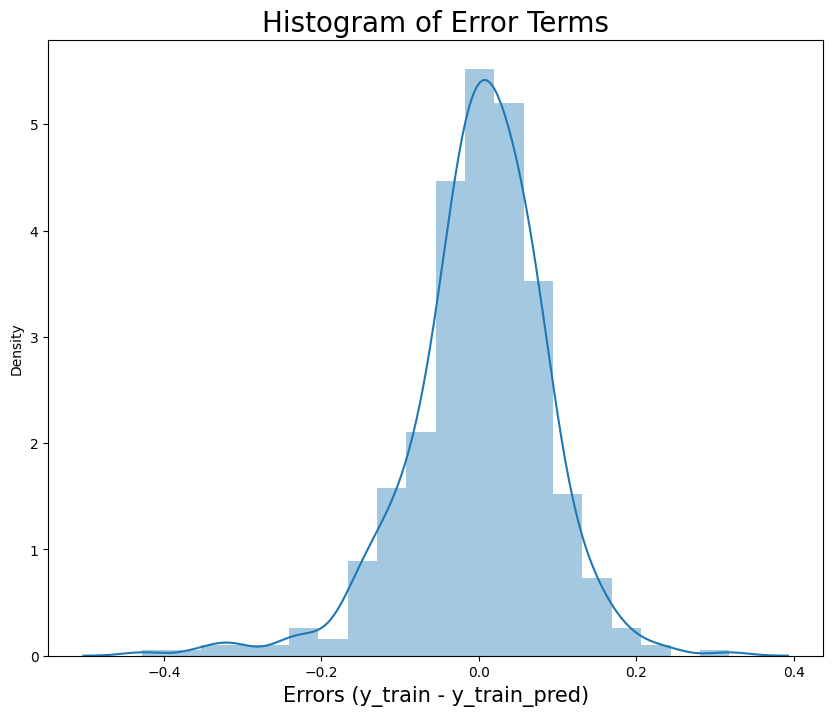

In [802]:
# Plotting histogram of residuals (error terms) to validate assumption 2

plt.figure(figsize=(10,8))
Errors = y_train - y_train_pred
sns.distplot(Errors, bins=20)
plt.title("Histogram of Error Terms", fontsize=20)
plt.xlabel("Errors (y_train - y_train_pred)", fontsize=15);

In [803]:
# Calculate the mean or error terms

print(np.mean(Errors))

-2.52466892707652e-16


- From above histogram and calculation, we observe that error terms/residuals are normally distributed with mean approximately zero
- Thus, our model will be good to make inferences on our 'bikes' dataset. Note that we wanted to know which variables are significant in predicting the demand for bikes.
- This also means that the p-values obtained in our model are reliable.

### Step 7: Making Predictions

In [804]:
# Scaling test data using the same columns used while scaling train data

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [805]:
# Verify that all the variables are scaled

df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


In [806]:
# Creating response variable y and predictor variable X from test data

y_test = df_test.pop('cnt')
X_test = df_test

In [807]:
# Check the dimensions

print(X_test.shape)
print(y_test.shape)

(219, 28)
(219,)


In [808]:
# Adding constant

X_test_sm = sm.add_constant(X_test)

In [809]:
# Dropping the variables that we dropped from training data

X_test_sm = X_test_sm.drop(['workingday', 'season_spring', 'mnth_Nov'], axis=1)

In [810]:
### Making predictions

y_test_pred = lr4.predict(X_test_sm)

### Step 8: Model Evaluation

In [811]:
# Evaluate the model

r2 = r2_score(y_test, y_test_pred)
r2

0.8179959322188337

In [812]:
# Next calculate adjusted R-squared using formula: Adj R^2 = (1−(1−R^2)∗(n−1)/(n−p−1))

n = X_test.shape[0]    # No. of rows of test data
p = X_test.shape[1]    # No. of columns of test data

adj_r2 = (1-(1-r2)*(n-1)/(n-p-1))
adj_r2

0.7911742801247671

### Inference:
- In our 4th model on training set, we got an R-squared of 0.852 and an adjusted R-squared of 0.845
- The same model gives an R-squared of 0.818 on test set and adjusted R-squared of 0.791.
- Thus, our model is working almost same on training as well as test data. It is not underfitting or overfitting.
- If we would have started with Null Hypothesis that all coefficients are zero , then from summary of our 6th model, we see that none of the coeeficients is zero. Thus, we reject our null hypothesis in favour of Alternate Hypothesis that our model is statistically significant.
- Hence, we conclude that our prediction model is significant.

## Conclusion:
- Both our final models obtained from *Backward Selection as well as RFE feature selection methods are significant.
- The common variables significant in predicting demand for sharde bikes are:
  1. 'temp'
  2. 'weathersit_light'
  3. 'yr'
  4. 'windspeed'
  

- These can be suggested to BoomBikes company as the factors most affecting the demand for rental bikes.